In [1]:
# set up matplotlib
%matplotlib widget
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams.update({"font.size": 14})

import numpy as np
import xarray as xr
from scipy.special import j0,j1
from scipy.interpolate import RectBivariateSpline
from xbout import open_boutdataset

In [2]:
cases = ["circle_cut","circle_cut2","circle_cut3", "circle_cut4"]
grids = ["lowest", "low", "mid", "high"]
data = []
ncs = []
for c, case in enumerate(cases):
    filepath = str(case) + "_BC/BOUT.dmp.*.nc"

    ds = open_boutdataset(datapath=filepath, chunks={"t": 4})
    dsn = xr.open_dataset("circle_dir_" + str(grids[c]) + "res.fci.nc")

    # Use squeeze() to get rid of the y-dimension, which has length 1 usually unless turbulent.
    ds = ds.squeeze(drop=True)
    dsn = dsn.squeeze(drop=True)

    dx = ds["dx"].isel(z=0).values
    # Get rid of existing "x" coordinate, which is just the index values.
    #ds = ds.drop("x")
    #Create a new coordinate, which is length in units of rho_s
    ds = ds.assign_coords(x=np.arange(ds.sizes["x"])*dx)

    data.append(ds)
    ncs.append(dsn)

/home/tirkas1/miniconda3/lib/python3.13/site-packages/xbout/load.py:341: UserWarning: No geometry type found, no physical coordinates will be added
  warn("No geometry type found, no physical coordinates will be added")
/home/tirkas1/miniconda3/lib/python3.13/site-packages/xarray/namedarray/core.py:264: UserWarning: Duplicate dimension names present: dimensions {'x'} appear more than once in dims=('x', 'x'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
/home/tirkas1/miniconda3/lib/python3.13/site-packages/xarray/namedarray/core.py:264: UserWarning: Duplicate dimension names present: dimensions {'x'} appear more than once in dims=('x', '

Read in:
<xbout.BoutDataset>
Contains:
<xarray.Dataset> Size: 6MB
Dimensions:             (x: 68, y: 1, z: 68, t: 21)
Coordinates:
    dx                  (x, y, z) float64 37kB dask.array<chunksize=(68, 1, 68), meta=np.ndarray>
    dy                  (x, y, z) float64 37kB dask.array<chunksize=(68, 1, 68), meta=np.ndarray>
    dz                  (x, y, z) float64 37kB dask.array<chunksize=(68, 1, 68), meta=np.ndarray>
  * t                   (t) float64 168B 0.0 5e+05 1e+06 ... 9e+06 9.5e+06 1e+07
  * x                   (x) int64 544B 0 1 2 3 4 5 6 7 ... 61 62 63 64 65 66 67
  * y                   (y) float64 8B 0.1963
  * z                   (z) float64 544B 0.007353 0.02206 ... 0.9779 0.9926
Data variables: (12/52)
    Bxy                 (x, y, z) float64 37kB dask.array<chunksize=(68, 1, 68), meta=np.ndarray>
    G1                  (x, y, z) float64 37kB dask.array<chunksize=(68, 1, 68), meta=np.ndarray>
    G2                  (x, y, z) float64 37kB dask.array<chunksize=(68,

/home/tirkas1/miniconda3/lib/python3.13/site-packages/xarray/namedarray/core.py:264: UserWarning: Duplicate dimension names present: dimensions {'x'} appear more than once in dims=('x', 'x'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
/home/tirkas1/miniconda3/lib/python3.13/site-packages/xarray/namedarray/core.py:264: UserWarning: Duplicate dimension names present: dimensions {'x'} appear more than once in dims=('x', 'x'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail si

Read in:
<xbout.BoutDataset>
Contains:
<xarray.Dataset> Size: 82MB
Dimensions:             (x: 260, y: 1, z: 260, t: 21)
Coordinates:
    dx                  (x, y, z) float64 541kB dask.array<chunksize=(260, 1, 260), meta=np.ndarray>
    dy                  (x, y, z) float64 541kB dask.array<chunksize=(260, 1, 260), meta=np.ndarray>
    dz                  (x, y, z) float64 541kB dask.array<chunksize=(260, 1, 260), meta=np.ndarray>
  * t                   (t) float64 168B 0.0 5e+05 1e+06 ... 9e+06 9.5e+06 1e+07
  * x                   (x) int64 2kB 0 1 2 3 4 5 6 ... 254 255 256 257 258 259
  * y                   (y) float64 8B 0.1963
  * z                   (z) float64 2kB 0.001923 0.005769 ... 0.9942 0.9981
Data variables: (12/52)
    Bxy                 (x, y, z) float64 541kB dask.array<chunksize=(260, 1, 260), meta=np.ndarray>
    G1                  (x, y, z) float64 541kB dask.array<chunksize=(260, 1, 260), meta=np.ndarray>
    G2                  (x, y, z) float64 541kB dask.a

/home/tirkas1/miniconda3/lib/python3.13/site-packages/xbout/load.py:341: UserWarning: No geometry type found, no physical coordinates will be added
  warn("No geometry type found, no physical coordinates will be added")
/home/tirkas1/miniconda3/lib/python3.13/site-packages/xarray/namedarray/core.py:264: UserWarning: Duplicate dimension names present: dimensions {'x'} appear more than once in dims=('x', 'x'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
/home/tirkas1/miniconda3/lib/python3.13/site-packages/xarray/namedarray/core.py:264: UserWarning: Duplicate dimension names present: dimensions {'x'} appear more than once in dims=('x', '

In [ ]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
def make_fluid_near_ghost_mask(inside, ghost):
    """
    Return a mask for fluid cells that have at least one ghost neighbor
    in +/-x or +/-z.
    """

    # Start with no neighbors marked
    nx, nz = inside.shape

    ghost_xp = np.zeros_like(ghost, dtype=bool)
    ghost_xm = np.zeros_like(ghost, dtype=bool)
    ghost_zp = np.zeros_like(ghost, dtype=bool)
    ghost_zm = np.zeros_like(ghost, dtype=bool)

    # Shift ghost mask to find neighbors
    ghost_xp[:-1, :] = ghost[1:, :]   # neighbor at +x
    ghost_xm[1:,  :] = ghost[:-1, :]  # neighbor at -x
    ghost_zp[:, :-1] = ghost[:, 1:]   # neighbor at +z
    ghost_zm[:, 1:]  = ghost[:, :-1]  # neighbor at -z

    has_ghost_neighbor = ghost_xp | ghost_xm | ghost_zp | ghost_zm

    # We only care about FLUID cells that see a ghost
    mask_fluid_near_ghost = inside.astype(bool) & has_ghost_neighbor.astype(bool)
    return mask_fluid_near_ghost

def l2_error_near_ghost_cells(dens, dens_true, inside, ghost, V=None, t_index=-1):
    """
    L2 error of density at time t_index, restricted to fluid cells
    that have at least one ghost neighbor in x or z.
    """
    if V is None:
        V = np.ones_like(inside, dtype=float)

    mask_edge = make_fluid_near_ghost_mask(inside, ghost)
    diff = dens[t_index] - dens_true[t_index]  # (nx, nz)
    l2_edge = np.sqrt(np.nanmean(diff.where(mask_edge)**2))
    
    xsz = np.shape(dens[t_index])[0]
    zsz = np.shape(dens[t_index])[1]
    xcut = xsz//2 - 2*xsz//64
    zcut = (zsz-4)//2 - 2*(zsz-4)//64
    ctr_diff = dens[t_index,xcut:-xcut,zcut:-zcut] - dens_true[t_index,xcut:-xcut,zcut:-zcut]
    l2_ctr = np.sqrt(np.nanmean(ctr_diff**2))
    return l2_edge, mask_edge, l2_ctr

def interpolate_on_boundary(x, z, density, dens_true, xb, zb, method="linear", t_index=-1):
    """
    Interpolate numerical and true density onto boundary points.

    Parameters
    ----------
    x, z : 1D arrays
        Grid coordinates in x and z directions.
    density, dens_true : 2D arrays, shape (len(x), len(z))
        Numerical and reference ("true") fields at a fixed time.
    xb, zb : arrays of same shape
        Boundary point coordinates (x_b, z_b).
    method : {"linear", "nearest"}, optional
        Interpolation method for RegularGridInterpolator.
        ("linear" ~ bilinear in 2D)

    Returns
    -------
    dens_b : array, same shape as xb
        Interpolated numerical density at boundary.
    dens_true_b : array, same shape as xb
        Interpolated true density at boundary.
    err_b : array, same shape as xb
        Pointwise error dens_b - dens_true_b.
    """
    # Flatten boundary points to (N, 2)
    pts = np.column_stack((xb.ravel(), zb.ravel()))

    interp_num = RegularGridInterpolator(
        (x, z), density[t_index,:,:].values,
        method=method,
        bounds_error=False,
        fill_value=None,  # extrapolate if slightly outside
    )
    interp_true = RegularGridInterpolator(
        (x, z), dens_true[t_index,:,:].values,
        method=method,
        bounds_error=False,
        fill_value=None,
    )

    dens_b_flat = interp_num(pts)
    dens_true_b_flat = interp_true(pts)

    dens_b = dens_b_flat.reshape(xb.shape)
    dens_true_b = dens_true_b_flat.reshape(xb.shape)
    err_b = dens_b - dens_true_b
    
    err_flat = err_b.ravel()
    l2 = np.sqrt(np.mean(err_flat**2))
    linf = np.max(np.abs(err_flat))
    return l2,linf


In [4]:
import numpy as np
from scipy.interpolate import RectBivariateSpline

def ib_boundary_errors_from_ghostid(
    dens_t,                 # 2D (nx,nz) at one timestep
    dens_true_t,            # Real dens for testing image points.
    dens_func,
    t_index,
    ghost_id,               # 2D (nx,nz) ints: -1 or gid into *_pts arrays
    gst_pts, bdy_pts, img_pts,  # 2D (Ng,2): gst_pts are (ix,iz) indices; bdy/img are (R,Z)
    normals,                # 2D (Ng,2): (nR,nZ)
    norm_dist,              # 1D (Ng,)
    Rarr, Zarr,             # 2D (nx,nz) physical coordinates
    is_plasma,              # node_in_plasma array.
    mask=None,              # optional 2D bool; if provided, reports stencil validity fraction
    bc_val_dir=0.0,         # constant Dirichlet value (ignored if phiB_true_fn provided)
    bc_val_neu=0.0,         # constant Neumann value (ignored if g_true_fn provided)
    phiB_true_fn=None,      # callable (R,Z)->phi_B_true for Dirichlet
    g_true_fn=None,         # callable (R,Z,nR,nZ)->dphi/dn true for Neumann
    use_norm_dist=True,     # if False, uses |I-B| computed from points
    check_equidistance=True):
    """
    Postprocess boundary errors for IB ghost-cell method using stored G,B,I pairing.

    Dirichlet:
      phi_B_hat = 0.5*(phi_G + phi_I)

    Neumann:
      g_hat = (phi_I - phi_G)/(2*d)  where d = norm_dist[gid] or |I-B|

    Returns a dict with L2/Linf metrics and some diagnostics.
    """

    dens_t = np.asarray(dens_t)
    ghost_id = np.asarray(ghost_id)

    # spline axes
    R1d = np.asarray(Rarr)[:, 0]
    Z1d = np.asarray(Zarr)[0, :]

    # bilinear spline for phi_I
    spl = RectBivariateSpline(R1d, Z1d, dens_t, kx=1, ky=1)
    spl_true = RectBivariateSpline(R1d, Z1d, dens_true_t, kx=3, ky=3)

    # find ghost grid locations and their ghost-record ids
    ii, kk = np.where(ghost_id >= 0)
    if ii.size == 0:
        return {
            "n_ghost": 0,
            "dir_l2": np.nan, "dir_linf": np.nan,
            "neu_l2": np.nan, "neu_linf": np.nan,
        }

    gid = ghost_id[ii, kk].astype(int)

    # phi_G from ghost grid cell
    phiG = dens_t[ii, kk]
    phiG_true = dens_true_t[ii,kk]

    # geometry at ghost-record level
    BI = img_pts[gid]          # (R,Z)
    BB = bdy_pts[gid]          # (R,Z)
    nR = normals[gid, 0]
    nZ = normals[gid, 1]

    # phi_I from spline at image points
    phiI = 2*norm_dist[gid]*(-bc_val_neu) + phiG #spl.ev(BI[:, 0], BI[:, 1])
    phiI_true = dens_func(BI[:,0], BI[:,1],t_index)

    # ---- Dirichlet error ----
    phiB = spl.ev(BB[:,0], BB[:,1])
    phiB_true = spl_true.ev(BB[:,0], BB[:,1])

    err_dir = phiB - phiB_true
    dir_l2 = np.sqrt(np.mean(err_dir**2))
    dir_linf = np.max(np.abs(err_dir))

    # ---- Neumann error ----
    if use_norm_dist:
        d = np.asarray(norm_dist)[gid].astype(float)
    else:
        d = np.sqrt((BI[:, 0] - BB[:, 0])**2 + (BI[:, 1] - BB[:, 1])**2)

    d = np.where(d > 0, d, np.nan)
    g_hat = (phiI - phiG) / (2.0 * d)

    if g_true_fn is not None:
        g_true = g_true_fn(BB[:, 0], BB[:, 1], nR, nZ)
    else:
        g_true = bc_val_neu * np.ones_like(g_hat)

    err_neu = g_hat - g_true
    neu_l2 = np.sqrt(np.nanmean(err_neu**2))
    neu_linf = np.nanmax(np.abs(err_neu))

    err_img = phiI - phiI_true
    err_gst = phiG - phiG_true

    # how many of the 4 nodes are plasma for each gid
    n_plasma = np.sum(is_plasma.astype(np.int32), axis=1)  # 0..4
    m_all_plasma  = (n_plasma == 4)  # all 4 plasma
    m_one_ghost   = (n_plasma == 3)  # exactly 1 ghost/non-plasma
    m_multi_ghost = (n_plasma <= 2)  # 2+ ghost/non-plasma

    def masked_norms(err, mask):
        # mask out everything else as NaN so nanmean/nanmax ignore them
        e = np.where(mask, err, np.nan)
        l2 = np.sqrt(np.nanmean(e**2))
        linf = np.nanmax(np.abs(e))
        return l2, linf

    img_l2_all,   img_linf_all   = masked_norms(err_img, m_all_plasma)
    img_l2_one,   img_linf_one   = masked_norms(err_img, m_one_ghost)
    img_l2_multi, img_linf_multi = masked_norms(err_img, m_multi_ghost)
    img_l2 = np.sqrt(np.nanmean(err_img**2))
    img_linf = np.nanmax(np.abs(err_img))


    gst_l2 = np.sqrt(np.nanmean(err_gst**2))
    gst_linf = np.nanmax(np.abs(err_gst))

    out = {
        "n_ghost": int(ii.size),
        "dir_l2": float(dir_l2),
        "dir_linf": float(dir_linf),
        "neu_l2": float(neu_l2),
        "neu_linf": float(neu_linf),
        "gst_l2": float(gst_l2),
        "gst_linf": float(gst_linf),
        "img_l2": float(img_l2),
        "img_linf": float(img_linf),
        "img_l2_allp": float(img_l2_all),
        "img_linf_allp": float(img_linf_all),
        "img_l2_oneg": float(img_l2_one),
        "img_linf_oneg": float(img_linf_one),
        "img_l2_multig": float(img_l2_multi),
        "img_linf_multig": float(img_linf_multi)
    }

    # ---- Optional diagnostics ----
    if check_equidistance:
        # Map gst_pts[gid]=(ix,iz) to physical (R,Z)
        gix = np.asarray(gst_pts)[gid, 0].astype(int)
        giz = np.asarray(gst_pts)[gid, 1].astype(int)
        nx, nz = dens_t.shape
        gix = np.clip(gix, 0, nx - 1)
        giz = np.clip(giz, 0, nz - 1)

        RG = np.asarray(Rarr)[gix, giz]
        ZG = np.asarray(Zarr)[gix, giz]

        d_BG = np.sqrt((RG - BB[:, 0])**2 + (ZG - BB[:, 1])**2)
        d_BI = np.sqrt((BI[:, 0] - BB[:, 0])**2 + (BI[:, 1] - BB[:, 1])**2)
        ratio = d_BG / np.where(d_BI > 0, d_BI, np.nan)

        out.update({
            "eq_max_abs_ratio_minus_1": float(np.nanmax(np.abs(ratio - 1.0))),
            "eq_mean_abs_ratio_minus_1": float(np.nanmean(np.abs(ratio - 1.0))),
        })

    if mask is not None:
        # Fraction of image-point bilinear stencils fully within "valid" mask
        valid = np.asarray(mask).astype(bool)
        iL = np.searchsorted(R1d, BI[:, 0], side="right") - 1
        kL = np.searchsorted(Z1d, BI[:, 1], side="right") - 1
        iL = np.clip(iL, 0, len(R1d) - 2)
        kL = np.clip(kL, 0, len(Z1d) - 2)
        stencil_ok = (
            valid[iL,   kL] &
            valid[iL+1, kL] &
            valid[iL,   kL+1] &
            valid[iL+1, kL+1]
        )
        out["image_stencil_valid_frac"] = float(np.mean(stencil_ok))

    return out

In [9]:
R0s = [0.5, 0.5, 0.5, 0.5]
Z0s = [0.4926470588235294, 0.4962121212121212, 0.4980769230769231, 0.499031007751938]
beta0 = 3.8317059702075125
a = 1/3
a_phys = 1/3
D = 0.4
m = 1.0
n = 1.0
bc_val = 2.0
const = 0.0
timestep_for_errs_early = 10
timestep_for_errs_late = 20 #100

q_unit = 1.602176634E-19
m_unit = 1.672621898E-27
T_unit = 5 #eV
w_unit = 95788333.030660808 #Omega_ci
t_unit = 1/w_unit
cs0 = np.sqrt(q_unit*T_unit/m_unit)
x_unit = cs0/w_unit

denses = []
dens_trues = []
masks = []
ghost_masks = []
dens_diffs = []
num_errs = []
l2_errs = []
linf_errs = []
l2_edges = []
l2_gsts = []
linf_gsts = []

lbda_errs = np.zeros_like(R0s)
l2_bd_err = []
l2_inner_errs = []
l2_imgs = []
linf_imgs = []
l2_imgs_allp = []
linf_imgs_allp = []
l2_imgs_oneg = []
linf_imgs_oneg = []
l2_imgs_multig = []
linf_imgs_multig = []
linf_bd_err = []
mass_changes = []
mass_errs = []

for d, dat in enumerate(data):
    print("Reading data for run: ", d)
    dens = dat["Nh+"]
    src = dat["SNh+"]

    mask = ncs[d]["in_mask"]
    vols = ncs[d]["vol_frac"]
    ghost_id = ncs[d]["ghost_id"].values
    ghost_mask = (ghost_id >= 0).astype(bool)
    full_mask = ghost_mask | mask.astype(bool)
    vols = np.where(mask, vols, 0)
    gst_pts = ncs[d]["ghost_pts"].values
    bdy_pts = ncs[d]["bndry_pts"].values
    img_pts = ncs[d]["image_pts"].values
    normals = ncs[d]["normals"].values
    norm_dist = ncs[d]["norm_dist"].values
    is_plasma = ncs[d]["is_plasma"].values
    Rarr = ncs[d]["R"].values
    Zarr = ncs[d]["Z"].values

    spl_e = RectBivariateSpline(Rarr[:,0], Zarr[0,:], dens.values[timestep_for_errs_early,:,:], kx=1, ky=1)
    spl_l = RectBivariateSpline(Rarr[:,0], Zarr[0,:], dens.values[timestep_for_errs_late,:,:],  kx=1, ky=1)

    nx = 64*(2**(d))
    nz = nx + 4
    dx = np.float64(1.0) / np.float64(nx)
    dz = np.float64(1.0) / np.float64(nz)

    # Centers in x; faces/nodes in z if that's your convention
    x = (np.arange(nx, dtype=np.float64) + 0.5) * dx     # centered x
    z = (np.arange(nz, dtype=np.float64)) * dz           # unshifted z

    ghosts_lo_x = x[0]  - dx*np.arange(2, 0, -1)
    ghosts_hi_x = x[-1] + dx*np.arange(1, 2+1)
    x = np.concatenate((ghosts_lo_x, x, ghosts_hi_x))
    xx,zz = np.meshgrid(x,z,indexing='ij')
    
    R_min, R_max = ncs[d]["R"].values[2,0], ncs[d]["R"].values[-3,0]
    Z_min, Z_max = ncs[d]["Z"].values[0,0], ncs[d]["Z"].values[0,-1]
    dR = ncs[d]["R"].values[1,0] - ncs[d]["R"].values[0,0]
    dZ = ncs[d]["Z"].values[0,1] - ncs[d]["Z"].values[0,0]

    x0 = R0s[d]
    z0 = Z0s[d]

    t64 = np.asarray(dat["t_array"].values, dtype=np.float64) # 1D time
    t_norm = t64*t_unit

    rho = np.hypot((xx - x0), (zz - z0)) #(R_max-R_min)*, (Z_max-Z_min)*
    spatial = 1.0/(1.0/3.0)*rho**2 #-(1.0/3.0)/(2.0*j1(2.0))*j0(beta0 * rho / a)
    temp    = 4.0 * D * (1.0/(1.0/3.0)) * t_norm #np.exp(-D * (beta0 / a_phys)**2 * t_norm)

    f = lambda x,z,t: const + 1.0/(1.0/3.0)*np.hypot((x-x0),(z-z0))**2 + 4.0 * D * (1.0/(1.0/3.0)) * t_norm[t]

    #Compare simulation lambda to analytic value:
    #Use density near the center, which is always 1...
    #n0 = dens.values[0,(nx+4)//2-1,nz//2-1]
    #n1 = dens.values[1,(nx+4)//2-1,nz//2-1]
    #dt = t_norm[1] - t_norm[0]
    #ratio = (n1 - const) / (n0 - const)
    #lambda_eff = -np.log(ratio) / (D * dt)
    #lbda = (beta0/a_phys)**2
    #print("Effective lambda from simulation after one timestep:", lambda_eff)
    #print("Analytic lambda:", lbda)
    #lbda_errs[d] = 100*np.abs((lambda_eff - lbda))/lbda
    #print(lbda)
    #print(lambda_eff)
    #print("Percent error:", lbda_errs[d])

    dens_true = dens.copy()
    dens_true[:] = const + spatial[np.newaxis,:,:] + temp[:,np.newaxis,np.newaxis]

    denses.append(dens)
    dens_trues.append(dens_true)
    masks.append(mask)
    ghost_masks.append(ghost_mask)
    
    #l2_err_b, linf_err_b = interpolate_on_boundary(
    #    Rarr[:,0], Zarr[0,:], dens, dens_true, bdy_pts[:,0], bdy_pts[:,1], method="linear",
    #    t_index = timestep_for_errs_early)
    t_index=0
    metrics = ib_boundary_errors_from_ghostid(
        dens_t=dens.values[t_index, :, :],
        dens_true_t = dens_true.values[t_index,:,:],
        dens_func = f,
        t_index=t_index,
        ghost_id=ghost_id,
        gst_pts=gst_pts,
        bdy_pts=bdy_pts,
        img_pts=img_pts,
        normals=normals,
        norm_dist=norm_dist,
        Rarr=Rarr,
        Zarr=Zarr,
        is_plasma=is_plasma,
        mask=full_mask,   # optional
        bc_val_dir=bc_val,
        bc_val_neu=bc_val)
    l2_err_b, linf_err_b = metrics["dir_l2"], metrics["dir_linf"]
    l2_img, linf_img = metrics["img_l2"], metrics["img_linf"]
    l2_gst, linf_gst = metrics["gst_l2"], metrics["gst_linf"]
    #print(metrics["image_stencil_valid_frac"])
    l2_bd_err.append(l2_err_b)
    linf_bd_err.append(linf_err_b)
    l2_imgs.append(l2_img)
    linf_imgs.append(linf_img)
    l2_gsts.append(l2_gst)
    linf_gsts.append(linf_gst)
    l2_imgs_allp.append(metrics["img_l2_allp"])
    linf_imgs_allp.append(metrics["img_linf_allp"])
    l2_imgs_oneg.append(metrics["img_l2_oneg"])
    linf_imgs_oneg.append(metrics["img_linf_oneg"])
    l2_imgs_multig.append(metrics["img_l2_multig"])
    linf_imgs_multig.append(metrics["img_linf_multig"])

    M0 = (dens.where(mask)*vols*dR*dZ)[0,:,:].sum().values
    M1 = (dens.where(mask)*vols*dR*dZ)[10,:,:].sum().values
    #M2 = (dens.where(mask)*vols*dR*dZ)[100,:,:].sum().values
    #M3 = (dens.where(mask)*vols*dR*dZ)[-1,:,:].sum().values
    mass = (dens.where(mask)*vols*dR*dZ).sum(dim=("x","z")).values
    mass_true = (dens_true.where(mask)*vols*dR*dZ).sum(dim=("x","z")).values
    # mass_diff = mass - M_test
    # print(mass[0:5])
    # print(M_test[0:5])
    massChanges = (dens.where(mask)*vols*dR*dZ)[-1,:,:].sum(dim=("x","z")).values \
                - (dens_true.where(mask)*vols*dR*dZ)[-1,:,:].sum(dim=("x","z")).values
    mass_errs.append(massChanges)
    #print(massChanges)
    #print(massChanges[1:] - massChanges[:-1])
    #print(2*np.pi*bc_val*D*a)


    #Get L2 error
    N_valid = np.sum(mask)
    dens_diff = np.abs(dens.where(mask)-dens_true.where(mask))
    linf_err_t = np.max(dens_diff)
    l2_err_t = np.sqrt(np.nanmean(dens_diff**2, axis=(1, 2)))
    #l2_err_t = np.sqrt(np.sum((dens_diff**2), axis=(1, 2)) / N_valid)
    dens_diffs.append(dens_diff)
    l2_errs.append(l2_err_t)
    linf_errs.append(linf_err_t.values)

    init_dens_diff = dens_diff[0,:,:]
    mask2 = init_dens_diff.notnull() & (init_dens_diff >= 1e-10)
    nerrs = int(mask2.sum().compute())
    num_errs.append(nerrs)

    L2_edge, edge_mask, l2_inner = l2_error_near_ghost_cells(dens, dens_true, mask, ghost_mask, V=vols*dR*dZ, t_index=10)
    l2_edges.append(L2_edge)
    l2_inner_errs.append(l2_inner)

#print('\n')
#print("Eigenmode rel. err.: ", lbda_errs[0], lbda_errs[1], lbda_errs[2], lbda_errs[3])
#print("Eigenmode rel. err. convergence: ", lbda_errs[0]/lbda_errs[1], lbda_errs[1]/lbda_errs[2], lbda_errs[2]/lbda_errs[3])

print('\n')
print("Mass change: ", mass_errs[0], mass_errs[1], mass_errs[2], mass_errs[3])
print("Mass change convergence: ", mass_errs[0]/mass_errs[1], mass_errs[1]/mass_errs[2], mass_errs[2]/mass_errs[3])

#print('\n')
#print("L2 Bdy Err: ", l2_bd_err[0], l2_bd_err[1], l2_bd_err[2], l2_bd_err[3])
#print("L2 Bdy Err convergence: ", l2_bd_err[0]/l2_bd_err[1], l2_bd_err[1]/l2_bd_err[2], l2_bd_err[2]/l2_bd_err[3])
#
#print('\n')
#print("Linf Bdy Err: ", linf_bd_err[0], linf_bd_err[1], linf_bd_err[2], linf_bd_err[3])
#print("Linf Bdy Err. convergence: ", linf_bd_err[0]/linf_bd_err[1], linf_bd_err[1]/linf_bd_err[2], linf_bd_err[2]/linf_bd_err[3])

print('\n')
print("L2 gst error: ", l2_gsts[0], l2_gsts[1], l2_gsts[2], l2_gsts[3])
print("L2 gst err convergence: ", l2_gsts[0]/l2_gsts[1], l2_gsts[1]/l2_gsts[2], l2_gsts[2]/l2_gsts[3])

print('\n')
print("L2 img error: ", l2_imgs[0], l2_imgs[1], l2_imgs[2], l2_imgs[3])
print("L2 img err convergence: ", l2_imgs[0]/l2_imgs[1], l2_imgs[1]/l2_imgs[2], l2_imgs[2]/l2_imgs[3])
print("L2 plasma img error: ", l2_imgs_allp[0], l2_imgs_allp[1], l2_imgs_allp[2], l2_imgs_allp[3])
print("L2 plasma img err convergence: ", l2_imgs_allp[0]/l2_imgs_allp[1], l2_imgs_allp[1]/l2_imgs_allp[2], l2_imgs_allp[2]/l2_imgs_allp[3])
print("L2 1g img error: ", l2_imgs_oneg[0], l2_imgs_oneg[1], l2_imgs_oneg[2], l2_imgs_oneg[3])
print("L2 1g img err convergence: ", l2_imgs_oneg[0]/l2_imgs_oneg[1], l2_imgs_oneg[1]/l2_imgs_oneg[2], l2_imgs_oneg[2]/l2_imgs_oneg[3])
print("L2 multig img error: ", l2_imgs_multig[0], l2_imgs_multig[1], l2_imgs_multig[2], l2_imgs_multig[3])
print("L2 multig img err convergence: ", l2_imgs_multig[0]/l2_imgs_multig[1], l2_imgs_multig[1]/l2_imgs_multig[2], l2_imgs_multig[2]/l2_imgs_multig[3])

print('\n')
print("L2 early innermost error: ", l2_inner_errs[0], l2_inner_errs[1], l2_inner_errs[2], l2_inner_errs[3])
print("L2 convergence in early innermost cells: ", l2_inner_errs[0]/l2_inner_errs[1], l2_inner_errs[1]/l2_inner_errs[2], l2_inner_errs[2]/l2_inner_errs[3])

print('\n')
print("L2 relative error in fluid cells touching ghosts: ", l2_edges[0], l2_edges[1], l2_edges[2], l2_edges[3])
print("L2 convergence in fluid cells touching ghosts: ", l2_edges[0]/l2_edges[1], l2_edges[1]/l2_edges[2], l2_edges[2]/l2_edges[3])

print('\n')
print("Cells different than analytic initial value: ", num_errs[0], num_errs[1], num_errs[2], num_errs[3])

print('\n')
print("Linf errs: ", linf_errs[0], linf_errs[1], linf_errs[2], linf_errs[3])
print("Linf convergence: ", linf_errs[0]/linf_errs[1], linf_errs[1]/linf_errs[2], linf_errs[2]/linf_errs[3])

print('\n')
print("L2 max errs: ", np.max(l2_errs[0]), np.max(l2_errs[1]), np.max(l2_errs[2]), np.max(l2_errs[3]))
print("L2 early errs: ", l2_errs[0][timestep_for_errs_early], l2_errs[1][timestep_for_errs_early], l2_errs[2][timestep_for_errs_early],
      l2_errs[3][timestep_for_errs_early])
print("L2 late errs: ", l2_errs[0][timestep_for_errs_late], l2_errs[1][timestep_for_errs_late], l2_errs[2][timestep_for_errs_late],
      l2_errs[3][timestep_for_errs_late])
print("L2 final errs: ", l2_errs[0][-1], l2_errs[1][-1], l2_errs[2][-1], l2_errs[3][-1])
print("L2 max convergence: ", np.max(l2_errs[0])/np.max(l2_errs[1]), np.max(l2_errs[1])/np.max(l2_errs[2]), np.max(l2_errs[2])/np.max(l2_errs[3]))

Reading data for run:  0
Reading data for run:  1
Reading data for run:  2
Reading data for run:  3


Mass change:  0.001779479159925046 0.0007866553772437057 0.0004481375522177311 0.00020704615329272813
Mass change convergence:  2.2620822426206635 1.7553882136204089 2.164433123199061


L2 gst error:  0.00035188760900240314 8.837847267301644e-05 2.3872890637454166e-05 5.831415296636953e-06
L2 gst err convergence:  3.981598667181322 3.7020432093949904 4.093841618727095


L2 img error:  0.00035141168980493094 8.811367872667527e-05 2.3738850974235982e-05 5.762134931360384e-06
L2 img err convergence:  3.9881627334502108 3.711792067034161 4.1198012988271815
L2 plasma img error:  0.00022611562526330076 5.770165665519403e-05 1.6055909164953766e-05 3.86197420419417e-06
L2 plasma img err convergence:  3.9187024839597373 3.5937956588059823 4.157435631630261
L2 1g img error:  0.0004618342458057857 0.00012154418731915276 3.205052703520308e-05 7.859040075566247e-06
L2 1g img err convergence:  3.799

Nh+ data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


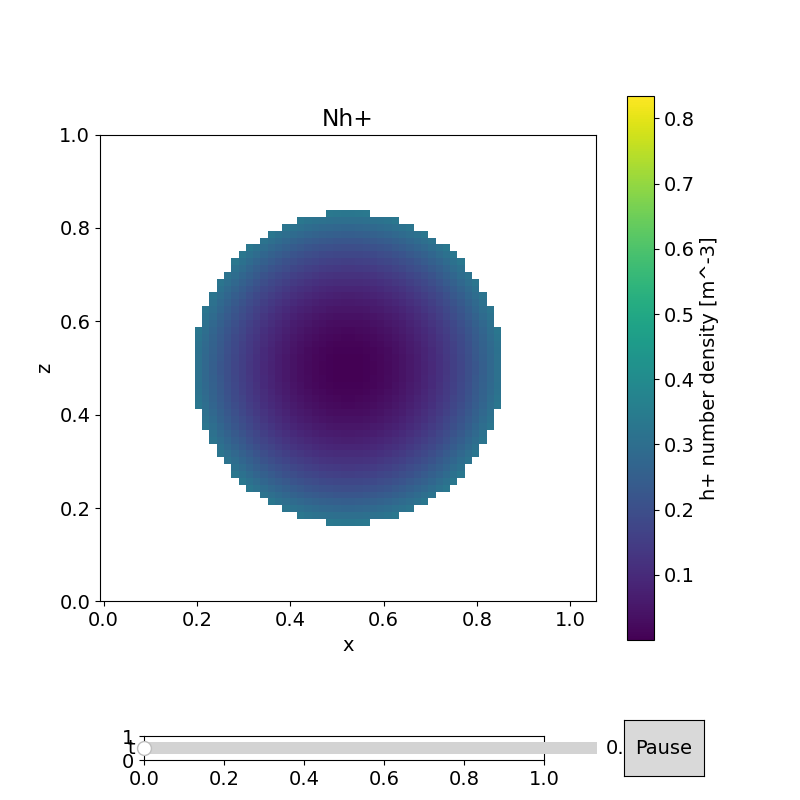

In [6]:
id = 0
dens_trues[id].where(masks[id]).bout.animate2D(aspect='equal')

In [7]:
d = 0

#dens = dat["Nh+"]
#src = dat["SNh+"]
#dens_true = dens.copy()

mask = ncs[d]["in_mask"]
#vols = ncs[d]["vol_frac"]
ghost_id = ncs[d]["ghost_id"].values
ghost_mask = (ghost_id >= 0).astype(bool)
full_mask = ghost_mask | mask.astype(bool)
#vols = np.where(mask, vols, 0)
gst_pts = ncs[d]["ghost_pts"].values
bdy_pts = ncs[d]["bndry_pts"].values
img_pts = ncs[d]["image_pts"].values
image_inds = ncs[d]["image_inds"].values
normals = ncs[d]["normals"].values
norm_dist = ncs[d]["norm_dist"].values
is_plasma = ncs[d]["is_plasma"].values
bd_ids = ncs[d]["bound_id"].values
mid_pts = ncs[d]["mid_pts"].values
bnorms = ncs[d]["bnorms"].values
s1 = ncs[d]["s1"].values
s2 = ncs[d]["s2"].values
Rarr = ncs[d]["R"].values
Zarr = ncs[d]["Z"].values

rmid = (Rarr[-1,0] + Rarr[0,0])/2
zmid = (Zarr[0,-1] + Zarr[0,0])/2
def dens_func(x, z, x0, z0, t_idx=0):
    #return ((x-x0)**2 + (z-z0)**2)
    r = np.hypot((x-x0),(z-z0))
    spatial = 1.0/(1.0/3.0)*r**2 #-(1.0/3.0)/(2.0*j1(2.0))*j0(beta0 * rho / a)
    temp    = 4.0 * D * (1.0/(1.0/3.0)) * t_norm[t_idx] #np.exp(-D * (beta0 / a_phys)**2 * t_norm)
    return spatial + temp

gid=0
bid=34
x0 = R0s[d]
z0 = Z0s[d]
print(image_inds[gid,0], image_inds[gid,1])
print("Node vals: ")
print(denses[0].values[0,13,27])
print(denses[0].values[0,13,28])
print(denses[0].values[0,14,27])
print(denses[0].values[0,14,28])
print(dens_trues[0].values[0,13,27])
print(dens_trues[0].values[0,13,28])
print(dens_trues[0].values[0,14,27])
print(dens_trues[0].values[0,14,28])
#print(dens[0,14,28].values)
print("Img val:" )
print(dens_func(img_pts[gid,0], img_pts[gid,1], x0, z0))
print("Gst val: ")
print(dens_func(gst_pts[gid,0],gst_pts[gid,1],x0,z0))
print("Bdry norm vals: ")
print(dens_func(mid_pts[bid,0], mid_pts[bid,1], x0, z0))
print(dens_func(mid_pts[bid,0] + s1*bnorms[bid,0], mid_pts[bid,1] + s1*bnorms[bid,1], x0, z0))
print(dens_func(mid_pts[bid,0] + s2*bnorms[bid,0], mid_pts[bid,1] + s2*bnorms[bid,1], x0, z0))
#print(np.sum(is_plasma[gid]))
#print(dens_func(gst_pts[gid,0], gst_pts[gid,1], x0, z0))

13.963650696588854 27.59118467967647
Node vals: 
0.3358726517955408
0.3274261580206531
0.3059147501486808
0.2981292830206531
0.3352116251486808
0.32742615802065306
0.30591475014868075
0.2981292830206531
Img val:
0.3021945641785929
Gst val: 
0.36597334389868075
Bdry norm vals: 
0.33316217525249986
0.3120559699958695
0.29164037014040717


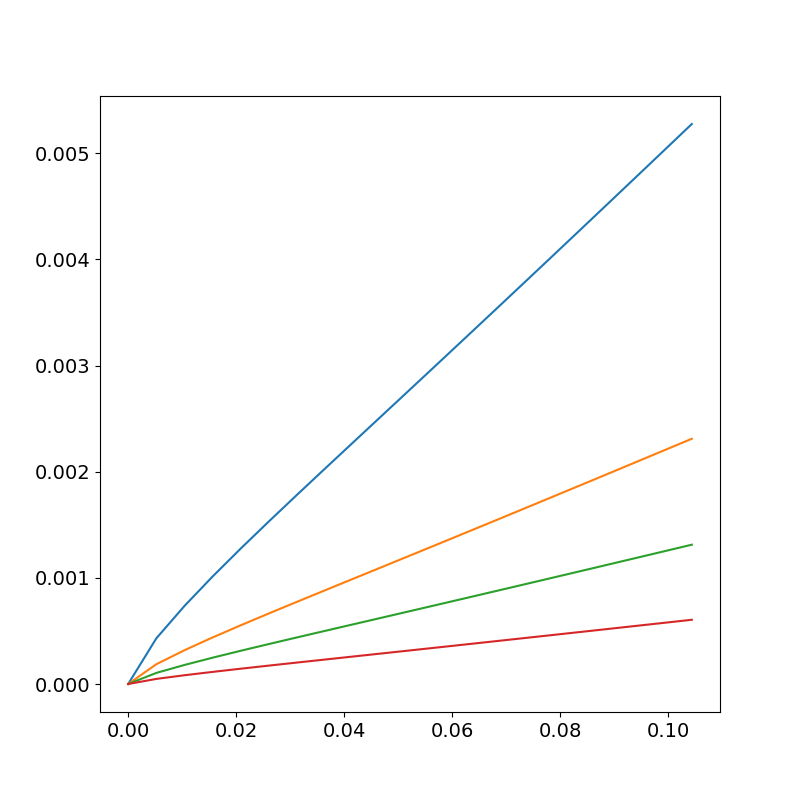

In [8]:
fig = plt.figure()
plt.plot(t_norm, l2_errs[0])
plt.plot(t_norm, l2_errs[1])
plt.plot(t_norm, l2_errs[2])
plt.plot(t_norm, l2_errs[3])
